This is my work for NLP. In this kernel, I am trying to implement some basics of Natural Language Process.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import nltk # it is the one of most comman libraries for Natural Language Process
import re # Regular Expression library

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
data = pd.read_csv("../input/gender-classifier-DFE-791531.csv", encoding="latin1")

# i will use only description column 
data = pd.concat([data.gender, data.description], axis=1)
data.dropna(axis = 0, inplace = True) # we dropped the null rows

In [ ]:
data.info()

In [ ]:
# genders have two options (male/female). so i changed male to 0 and female to 1.
data.gender = [1 if gender == "female" else 0 for gender in data.gender]

In [ ]:
description_list = [] # we created a list so we after these steps, we will append into this list
for description in data.description:
    description = re.sub("[^a-zA-Z]", " ", description)
    # sub method finds the given pattern ([^a-zA-Z] means, NOT letter like ":") and changes them with " " (space)
    description = description.lower()
    # we need to have all letters lowercase (because A is not equall to a)
    description = nltk.word_tokenize(description)
    # we make a word list from our text
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    # we found the roots of each words with lemma
    description = " ".join(description)
    # after all these steps,we joined the words together and remake our text.
    description_list.append(description)
    # and append these texts into the list we created.

Here is how "Bag of Words" method works:

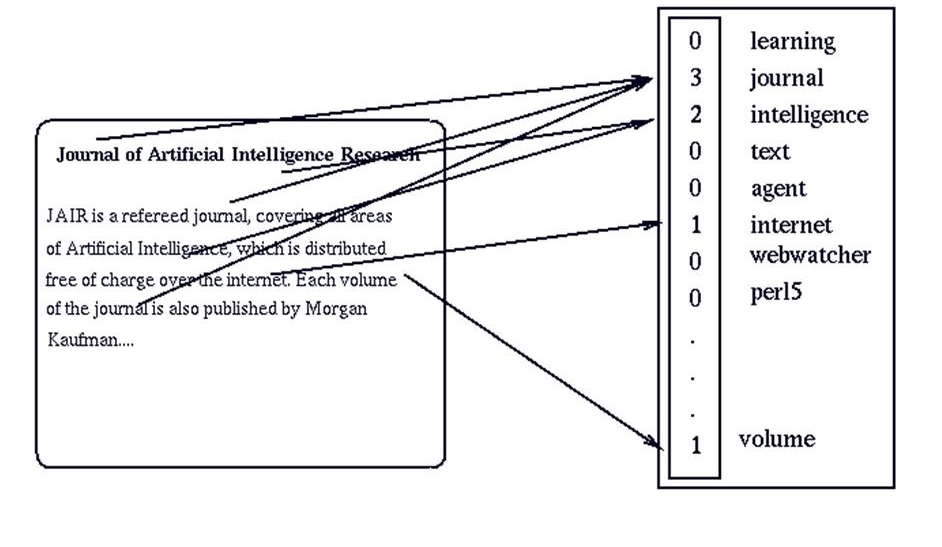

In [ ]:
# now, we will implement "bag of words" method
from sklearn.feature_extraction.text import CountVectorizer

max_features = 5000 # we will take top 5000 feature 

cv = CountVectorizer(max_features=max_features, stop_words = "english")
# in this method, we remove the stopwords (irrelevant words) in English language. (like "of", "and", "the" etc.)

sparce_matrix = cv.fit_transform(description_list).toarray()

print("top used {} words: {}".format(max_features, cv.get_feature_names()))

These are the most comman words in description list.

In [ ]:
y = data.iloc[:, 0].values
x = sparce_matrix

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)


In [ ]:
# Random Forest Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# prediction
y_pred = rf.predict(x_test)

In [ ]:
accuracy = 100.0 * accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)